<a href="https://colab.research.google.com/github/stuti24m/Dimensionality-Reduction-using-Autoencoders-in-Python/blob/master/Dimensionality_Reduction_using_an_Autoencoder_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from keras.layers import Input,Dense
from keras.models import Model
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
## size of encoded representation --- (we will reduce our initial features to this number)
encoding_dim = 32  # 32 floats --> compressiong of factor 24.5, assuming the input is 784 floats


In [0]:
## input placeholder 
input_img = Input(shape=(784,))

In [0]:
## Defining the encoded layer
encoded = Dense(encoding_dim, activation = 'relu')(input_img)


In [0]:
## "decoded" is the lossy representation of the input 
decoded = Dense(784, activation = 'sigmoid')(encoded)

In [0]:
## the model maps an input to its reconstruction
autoencoder = Model(input_img,decoded)

In [0]:
## the model maps an input to its encoded representation
encoder = Model(input_img,encoded)

In [0]:
## creating a placeholder for an encoded (32 dimensional) input
encoded_input = Input(shape=(encoding_dim,))

In [0]:
## retrieve the last layer of autoencoder model
decoder_layer = autoencoder.layers[-1]

In [0]:
## create the decoder model 
decoder = Model(encoded_input,decoder_layer(encoded_input))

In [0]:
## configure the model to use a per pixel binary crossentropy loss, and the Adadelta optimizer
autoencoder.compile(optimizer ='adadelta',loss = 'binary_crossentropy')

In [0]:
## prepare the input data. Here we are using MNIST digits and we are discarding the labels
(x_train, _), (x_test, _) = mnist.load_data()

In [0]:
## normalize all the data between 0 and 1 and we would flatten the image of 28*28 into vector size of 784.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [0]:
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:]))) 

In [44]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [45]:
## Training our Autoencoder
autoencoder.fit(x_train, x_train, epochs = 100, batch_size = 256, shuffle = True, validation_data = (x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.3552 - val_loss: 0.2699
Epoch 2/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.2615 - val_loss: 0.2496
Epoch 3/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.2396 - val_loss: 0.2276
Epoch 4/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.2202 - val_loss: 0.2104
Epoch 5/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.2052 - val_loss: 0.1977
Epoch 6/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.1944 - val_loss: 0.1885
Epoch 7/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.1863 - val_loss: 0.1814
Epoch 8/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.1797 - val_loss: 0.1753
Epoch 9/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.1740 - val_loss: 0.1

In [0]:
## encode and decode some digits
## we take them from the test set

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)




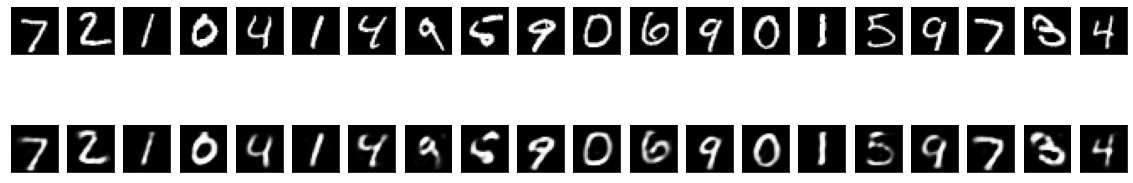

In [47]:
## Visualize the reconstructed inputs and the encoded representation using Matplotlib.

n = 20                                ## number of digits you will display
plt.figure(figsize=(20,4))
for i in range(n):
    # display the original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i+1+n )
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()